SVMs are supervised learning algorithms that can be used for classification, regression, and outlier identification. Support vector machines have the following advantages: In high-dimensional spaces, it fits well. This technique is effective where the number of dimensions exceeds the number of samples. Since it uses a subset of training points (called support vectors) in the decision function, it is memory effective.

[-1]


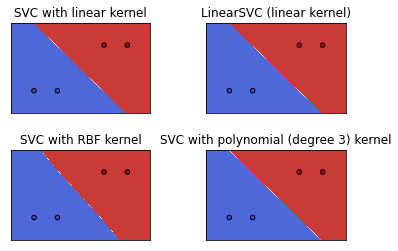

In [1]:
#################################
########### Gemal Hisuin ########
########## ID: hg11144v  ########
########## COSI #################

########## Fundamentals of Machine Learning #######
########## Support Vector Machines ################
########## Practical Session 2 ####################
###################################################


#### Ex.2 SVM with Scikit-Learn ############

import numpy as np # array-processing package
import matplotlib.pyplot as plt # manipulate elements of a figure
from sklearn import svm # a set of supervised learning methods used for classification, regression and outliers detection. 
from sklearn.svm import SVC #import of the SVC class for SVM

X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]]) #we create 4 examples
y = np.array([-1, -1, 1, 1])

classif=SVC() #we create a SVM with default parameters
classif.fit(X,y) #we learn the model according to given data
res=classif.predict([[-0.8, -1]]) #prediction on a new sample
print(res);


def make_meshgrid(x, y, h=.02):
    
    ## We Create a mesh of points to plot in Parameters
 
    x_min, x_max = x.min() - 1, x.max() + 1 # x: data to base x-axis meshgrid on
    y_min, y_max = y.min() - 1, y.max() + 1 # y: data to base y-axis meshgrid on
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), # h: stepsize for meshgrid, optional
                         np.arange(y_min, y_max, h))
    return xx, yy # Returns xx, yy : ndarray

def plot_contours(ax, clf, xx, yy, **params):
     
## Plot the decision boundaries for a classifier.

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # clf is a classifier; xx is meshgrid ndarray; yy is meshgrid ndarray 
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params) # ax is matplotlib axes object ; params is dictionary of 
                                            # ... params to pass to contourf, optional
    return out

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# cross validation accuracy
accuracy = cross_val_score(models, X, y, scoring='accuracy', cv = 10)
print(accuracy)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=1)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

""" Comparison of different linear SVM classifiers on a 2D projection.
The result shows the decision surface plot for four SVM classifiers with different kernels.

Since we only consider a limited number of data, the results indicate the same decision boundaries.

"""


The SVM algorithm is effective and offers several hyperparameters to be tuned with the gradient boost. The first and most critical parameter is the kernel selection, which determines how the input variables are predicted. There are several options, but linear, polynomial, and RBF are the most common, with linear and RBF being the most common in operation.

Accuracy of the tuned model: 0.873333; gained thorough: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.840000 (0.140475) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.846667 (0.143139) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.866667 (0.129957) with: {'C': 50, 'gamma': 'scale', 'kernel': 'linear'}
0.860000 (0.128062) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.860000 (0.128062) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.873333 (0.120922) with: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.820000 (0.181475) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.846667 (0.111754) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.853333 (0.102415) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}
0.806667 (0.182452) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.860000 (0.117189) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.860000 (0.117189) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.620000 (0.173973) wi

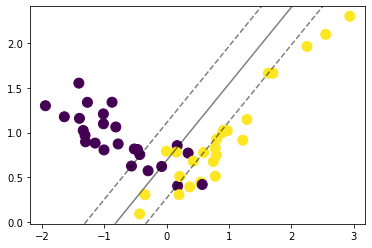

In [62]:
### 3 Dataset Generation  #####
### 3.1 3.1 Random datasets ###

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# we create separable points
X, y = make_classification(n_samples=50,n_features=2, n_redundant=0, n_informative=2,
                           random_state=2, n_clusters_per_class=1)

# define model 
model = SVC()

# define parameters
kernel = ['poly', 'rbf', 'linear'] # three different kernels to be considered 
C = [50, 10, 1.0, 0.1, 0.01] # possible values of C parameter
gamma = ['scale'] # gamma with scale
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma) # generates candidates from a grid of parameter values specified 
                                           # ... with the param_grid parameter
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # provides a way to improve the 
                                                                       #...estimated performance of a machine learning model

# The GridSearchCV implements the usual estimator API
# The GridSearchCV helps to loop through predefined hyperparameters and fit your estimator (model) on your training set

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

grid_result = grid_search.fit(X, y) # used to run fit with all sets of parameters.

# Cross validation accuracy
#accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10) # cross validation 
#print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100) # print the accuracy of the cross validation

# summarize results
print("Accuracy of the tuned model: %f; gained thorough: %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score'] # mean calculated on all samples 
stds = grid_result.cv_results_['std_test_score'] # standard deviation on all samples
params = grid_result.cv_results_['params'] # Parameter names mapped to their values.
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
clf=grid_result # Assigning clf to grid_result [I'm using clf just for simplicity]

plt.scatter(X[:, 0], X[:, 1], c=y, s=100) # scatter plot

# #############################################################################
# Visualization
#
# draw visualization of parameter effects
# plot the decision function

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
plt.show()


Accuracy of the tuned model: 1.000000; gained through {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.900000 (0.122474) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
1.000000 (0.000000) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.816667 (0.169967) with: {'C': 50, 'gamma': 'scale', 'kernel': 'linear'}
0.900000 (0.122474) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
1.000000 (0.000000) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.825000 (0.160078) with: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.841667 (0.136677) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.975000 (0.075000) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.833333 (0.162447) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}
0.775000 (0.162660) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.833333 (0.162447) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.825000 (0.160078) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.675000 (0.146487) with: {

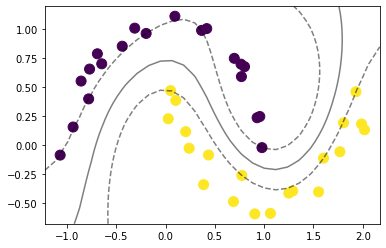

In [73]:
### 3.2 Existing datasets 
### make_moons

import numpy as np
from sklearn.datasets import make_moons #import make_moons data from sklearn
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# we create 40 separable points
X, y = make_moons(noise = 0.1, random_state=1, n_samples=40)

# define model 
model = SVC()

# define parameters
kernel = ['poly', 'rbf', 'linear'] # three different kernels to be considered 
C = [50, 10, 1.0, 0.1, 0.01] # possible values of C parameter
gamma = ['scale'] # gamma with scale

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma) # generates candidates from a grid of parameter values specified 
                                           # ... with the param_grid parameter
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # provides a way to improve the 
                                                                       #...estimated performance of a machine learning model

# The GridSearchCV implements the usual estimator API
# The GridSearchCV helps to loop through predefined hyperparameters and fit your estimator (model) on your training set
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y) # used to run fit with all sets of parameters.

# Cross validation accuracy 
# accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10) # cross validation accuracy
 #print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100) # print the accuracy of the cross validation

# summarize results
print("Accuracy of the tuned model: %f; gained through %s" % (grid_result.best_score_, grid_result.best_params_)) # display the recommended result
means = grid_result.cv_results_['mean_test_score'] # mean calculated on all samples 
stds = grid_result.cv_results_['std_test_score'] # standard deviation on all samples
params = grid_result.cv_results_['params'] # Parameter names mapped to their values.
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
        
clf=grid_result # Assigning clf to grid_result [I'm using clf just for simplicity]

plt.scatter(X[:, 0], X[:, 1], c=y, s=100) # scatter plot

# #############################################################################
# Visualization
#
# draw visualization of parameter effects
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
plt.show()

In [74]:
#iris dataset

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# import iris data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# define model 
model = SVC()

#define parameters
kernel = ['poly', 'rbf', 'linear'] # three different kernels to be considered 
C = [50, 10, 1.0, 0.1, 0.01] # possible values of C parameter
gamma = ['scale'] # gamma with scale
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma) # generates candidates from a grid of parameter values specified 
                                           # ... with the param_grid parameter

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # provides a way to improve the 
                                                                       #...estimated performance of a machine learning model

# The GridSearchCV implements the usual estimator API
# The GridSearchCV helps to loop through predefined hyperparameters and fit your estimator (model) on your training set
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y) # used to run fit with all sets of parameters.

# cross validation accuracy
# accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10) # cross validation accuracy
# print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100) # print the score

# summarize results
print("Accuracy of the tuned model: %f; gained thorough %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score'] # mean calculated on all samples
stds = grid_result.cv_results_['std_test_score'] # standard deviation on all samples
params = grid_result.cv_results_['params'] # Parameter names mapped to their values.
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
#clf=grid_result # Assigning clf to grid_result [I'm using clf just for simplicity]



# #############################################################################
# Visualization
#
# draw visualization of parameter effects
# plot the decision function
#ax = plt.gca()
#xlim = ax.get_xlim()
#ylim = ax.get_ylim()
#plt.scatter(X[:, 0], X[:, 1], c=y, s=100) # scatter plot
# create grid to evaluate model
#xx = np.linspace(xlim[0], xlim[1], 30)
#yy = np.linspace(ylim[0], ylim[1], 30)
#YY, XX = np.meshgrid(yy, xx)
#xy = np.vstack([XX.ravel(), YY.ravel()]).T
#Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
#ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#           linestyles=['--', '-', '--'])
# plot support vectors
#plt.show()

Accuracy of the tuned model: 0.811111; gained thorough {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.793333 (0.117189) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.791111 (0.120164) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.806667 (0.118447) with: {'C': 50, 'gamma': 'scale', 'kernel': 'linear'}
0.797778 (0.113507) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.793333 (0.122141) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.804444 (0.120411) with: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.802222 (0.118613) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.811111 (0.119360) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.806667 (0.120922) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}
0.797778 (0.119856) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.791111 (0.124999) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.800000 (0.120493) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.806667 (0.123348) with:

In [5]:
### 4 'Real' dataset
 
import pandas as pd 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import random
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


# Read data from file (in the same directory python process is based)
data = pd.read_excel("AirQualityUCI.xlsx") 

# Delete two columns from the DataFrame
data = data.drop(labels=["Date", "Time"], axis=1)

# remove the records with -200 values 
for i in data.columns:
    data.loc[data[i] == -200, [i]] = None
#print(data)

# Replace NaNs in all columns with the mean of values in the same column
for i in data.columns:
    data[i].fillna(value=data[i].mean(), inplace=True)
#print('Updated Dataframe:')
#print(data)


#y = data[:,0] > 1.2
data['CO(GT)'] = (data['CO(GT)'] > 1.2).astype(int)
#print(data)

# attributes that define the data matrix
#X  = data[['PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3) ', 'T','RH','AH']]
X  = data[['PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','T','RH','AH']]
y = data['CO(GT)']

# normalize dataset for easier parameter selection
normalized_X = StandardScaler().fit_transform(X) #where X is the data matrix
#print("Standardized", normalized_X)

# define model
model = svm.SVC()
# cross validation accuracy
#accuracy = cross_val_score(model, normalized_X, y, scoring='accuracy', cv = 10)
#print(accuracy)

print('Tunning hyperparameters using GridsearchCV')

#define parameters
kernel = ['poly', 'rbf', 'linear'] # three different kernels to be considered 
C = [50, 10, 1.0, 0.1, 0.01] # possible values of C parameter
gamma = ['scale'] # gamma with scale
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma) # generates candidates from a grid of parameter values specified 
                                           # ... with the param_grid parameter

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # provides a way to improve the 
                                                                       #...estimated performance of a machine learning model

# The GridSearchCV implements the usual estimator API
# The GridSearchCV helps to loop through predefined hyperparameters and fit estimator (model) on your training set
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y) # used to run fit with all sets of parameters.

# cross validation accuracy
# accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10) # cross validation accuracy
# print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100) # print the score

# summarize results
print("Accuracy of the tuned model: %f; gained thorough %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score'] # mean calculated on all samples
stds = grid_result.cv_results_['std_test_score'] # standard deviation on all samples
params = grid_result.cv_results_['params'] # Parameter names mapped to their values.
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


print('Comparison of cross validation using different parameters and kernels')
# Cross validation accuracy [Linera Kernel]
clf1 = svm.SVC(kernel='linear', C=1)
accuracy = cross_val_score(clf1, X, y, cv=10) # average over cross-validation folds
print("Cross validation accuracy [Linera Kernel]:",accuracy.mean() * 100)

# Cross validation accuracy [rbf Kernel]
clf2 = svm.SVC(kernel='rbf', gamma=1.0, C=2)
accuracy = cross_val_score(clf2, X, y, cv=10) # average over cross-validation folds
print("Cross validation accuracy [rbf Kernel]:",accuracy.mean() * 100)

# Cross validation accuracy [Linera Kernel normalized data]
clf3 = svm.SVC(kernel='linear', C=1)
accuracy = cross_val_score(clf3, normalized_X, y, cv=10) # average over cross-validation folds
print("Cross validation accuracy [Linera Kernel normalized data]:",accuracy.mean() * 100)

#Cross validation accuracy [rbf Kernel normalized data]
clf4 = svm.SVC(kernel='rbf', gamma=1.0, C=2)
accuracy = cross_val_score(clf4, normalized_X, y, cv=10) # average over cross-validation folds
print("Cross validation accuracy [rbf Kernel normalized data]:",accuracy.mean() * 100) 

''' The best performance is obtained from  C': 50, 'gamma': 'scale', 'kernel': 'rbf'.
For rbf kernel, the normalized data gives higher accuracy than unnormalized data '''


Tunning hyperparameters using GridsearchCV
Accuracy of the tuned model: 0.888284; gained thorough {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.886040 (0.010916) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.888284 (0.008716) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.876850 (0.009757) with: {'C': 50, 'gamma': 'scale', 'kernel': 'linear'}
0.886183 (0.009960) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.885755 (0.009813) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.877848 (0.010291) with: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.883832 (0.009932) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.884331 (0.010217) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.879272 (0.010676) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}
0.879807 (0.010520) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.879379 (0.011372) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.883298 (0.010541) with: {'C': 0.1, 'gamma': 'scale', 'ke

In [1]:
### Regression
 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVR  # import a statistical method that examines the linear
                             # ... relationship between two continuous variables
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

# Read data from file (in the same directory python process is based)
data = pd.read_excel("AirQualityUCI.xlsx") 

# Delete two columns from the DataFrame
data = data.drop(labels=["Date", "Time"], axis=1)

# remove the records with -200 values 
for i in data.columns:
    data.loc[data[i] == -200, [i]] = None
#print(data)

# Replace NaNs in all columns with the mean of values in the same column
for i in data.columns:
    data[i].fillna(value=data[i].mean(), inplace=True)
#print('Updated Dataframe:')
#print(data)

#data.corr(method ='kendall') 

# select the attributes that have higher correlation with the labeled data

X  = data[['PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)']] # selected dataframe
y = data['CO(GT)'] # target

X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.25) # splitting the training and test dataset

svr_linear = SVR(kernel='linear', C=1) # Defining linear kernel regression
svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.1) # Defining rbf kernel regression
svr_poly = SVR(kernel='poly', C=1e4, degree=2) # Defining polynomial regression
y_linear = svr_linear.fit(X_train, Y_train) # describe the linear kernel relationship 
                                            # ... between predictor variable and a response variable 
y_rbf = svr_rbf.fit(X_train, Y_train)       # describe the rbf kernel relationship 
                                            # ...between predictor variable and a response variable 
y_poly = svr_poly.fit(X_train, Y_train) # describe the polynomial relationship between 
                                        # ...predictor variable and a response variable for

accuracy = cross_val_score(y_linear, X, y, cv=3) # average over cross-validation folds for linear kernel
print("[Unnormalized] Cross validation accuracy [Linear Kernel]:",accuracy.mean() * 100)

#accuracy = cross_val_score(y_rbf, X, y, cv=3) # average over cross-validation folds for rbf kernel
#print("Cross validation accuracy [rbf Kernel]:",accuracy.mean() * 100)

#accuracy = cross_val_score(y_poly, X, y, cv=3) # average over cross-validation folds for polynomial kernel
#print("Cross validation accuracy [polynomial]:",accuracy.mean() * 100)

# normalize dataset for easier parameter selection
normalized_X = StandardScaler().fit_transform(X) #where X is the data matrix
#print("Standardized", normalized_X)

X_train, X_test, Y_train, Y_test=train_test_split(normalized_X, y, test_size=0.25) # splitting the training and test dataset

svr_linear = SVR(kernel='linear', C=1) # Defining linear kernel regression
svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.1) # Defining rbf kernel regression
svr_poly = SVR(kernel='poly', C=1e4, degree=2) # Defining polynomial regression
y_linear = svr_linear.fit(X_train, Y_train) # describe the linear kernel relationship 
                                            # ... between predictor variable and a response variable 
y_rbf = svr_rbf.fit(X_train, Y_train)       # describe the rbf kernel relationship 
                                            # ...between predictor variable and a response variable 
y_poly = svr_poly.fit(X_train, Y_train) # describe the polynomial relationship between 
                                        # ...predictor variable and a response variable for

accuracy = cross_val_score(y_linear, normalized_X, y, cv=3) # average over cross-validation folds for linear kernel
print("[Normalized] Cross validation accuracy [Linear Kernel]:",accuracy.mean() * 100)

#accuracy = cross_val_score(y_rbf, X, y, cv=3) # average over cross-validation folds for rbf kernel
#print("Cross validation accuracy [rbf Kernel]:",accuracy.mean() * 100)

#accuracy = cross_val_score(y_poly, X, y, cv=3) # average over cross-validation folds for polynomial kernel
#print("Cross validation accuracy [polynomial]:",accuracy.mean() * 100)

[Unnormalized] Cross validation accuracy [Linear Kernel]: 68.64868737253809
[Normalized] Cross validation accuracy [Linear Kernel]: 70.21253650569409
